# Studi Kasus Iris langsung pakai k=3

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Preparation

In [44]:
dataset =pd.read_csv(r'E:\pythonjupyter\datasets\Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# EDA

In [45]:
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [47]:
rows,columns = dataset.shape
print("Jumlah Baris:",rows)
print("Jumlah Kolom:",columns)

Jumlah Baris: 150
Jumlah Kolom: 6


In [48]:
data_explore = dataset.drop(columns=["Id","Species"])
data_explore

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<Axes: >

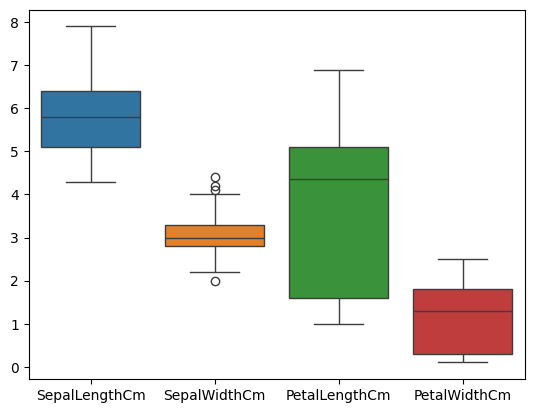

In [49]:
sns.boxplot(data_explore)

# Modelling

### Pilih Fitur

In [50]:
x=dataset[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Data Preprocessing

##### Normalisasi

In [ ]:
x_scaled = (x -  np.min(x, axis=0)) / (np.max(x, axis=0)  -  np.min(x, axis=0))  

### Hitung Jarak Euclidean

In [52]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

### Clustering

In [ ]:
def k_means_clustering(data, k, max_iter=1000):
    #Inisialisasi centroid 
    np.random.seed(42)  
    initial_centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    
    centroids = initial_centroids
    for _ in range(max_iter):
        # Tetapkan setiap titik ke centroid terdekat
        clusters = [[] for _ in range(k)]
        for point in data:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(point) # Tambah titik ke cluster yang sesuai
        
        # Perbarui Centroid
        new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] 
                                   for i, cluster in enumerate(clusters)])
        
        # Cek konvergensi
        if np.all(new_centroids == centroids):
            break
        centroids = new_centroids
    
    return centroids, clusters

In [54]:
final_centroids, final_clusters = k_means_clustering(x_scaled, k=3)


print("Centroid Akhir:")
print(final_centroids)


Centroid Akhir:
[[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


# Visualisasi

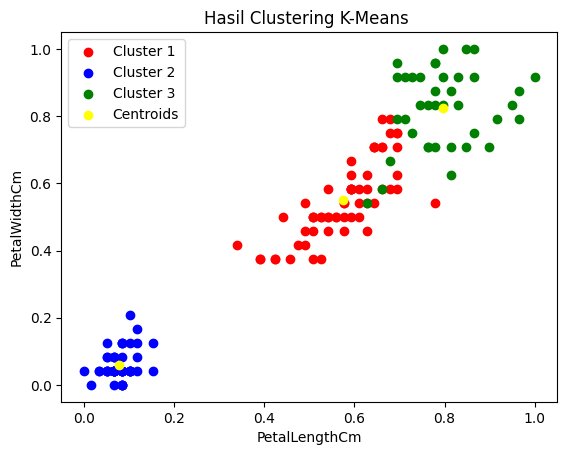

In [61]:
cluster_colors = ['red', 'blue', 'green']

for cluster_idx in range(3):
    cluster_points = np.array(final_clusters[cluster_idx])
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3],  
                color=cluster_colors[cluster_idx], label=f'Cluster {cluster_idx+1}')

plt.scatter(final_centroids[:, 2], final_centroids[:, 3],  
            color='yellow', marker='o', label='Centroids')

plt.title('Hasil Clustering K-Means ')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()
plt.show()

# Evaluasi

In [ ]:
labels = np.array([np.argmin([euclidean_distance(point, centroid) for centroid in final_centroids]) for point in x_scaled])

# Fungsi inertia untuk evaluasi
def inertia(data, centroids, labels):
    total_inertia = 0
    for i, point in enumerate(data):
        cluster_idx = labels[i]  # Cluster terdekat untuk titik ini
        total_inertia += euclidean_distance(point, centroids[cluster_idx]) ** 2 # jarak ke centroid
    return total_inertia


inertia_value = inertia(x_scaled, final_centroids, labels)
print(f'Inertia : {inertia_value.round()}')


Inertia : 7.0
